## 3.5 텐서플로를 사용한 신경망 구현

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)

In [2]:
# 입력 뉴런 개수
input_layer_nodes = 784

# 은닉층의 뉴런 개수
hidden_layer_nodes = 15

# 은닉층의 가중치와 바이어스
w1 = tf.Variable(tf.random.normal((input_layer_nodes, hidden_layer_nodes)))
b1 = tf.Variable(tf.random.normal((hidden_layer_nodes,)))

# 은닉층 출력 계산
@tf.function
def hidden_output(X_batch):
    return tf.nn.sigmoid(tf.add(tf.matmul(X_batch, w1), b1))

In [3]:
# 출력층의 가중치와 바이어스
w2 = tf.Variable(tf.random.normal((hidden_layer_nodes, 10)))
b2 = tf.Variable(tf.random.normal((10,)))

# 출력층 출력 계산
@tf.function
def final_output(X_batch):
    return tf.nn.sigmoid(tf.add(tf.matmul(hidden_output(X_batch), w2), b2))

In [4]:
# 손실함수
@tf.function
def loss(X_batch, y_target):
    return tf.nn.softmax_cross_entropy_with_logits(y_target, final_output(X_batch))

In [5]:
# 최적화 객체
optimizer = tf.keras.optimizers.Adam()

# 학습 실행 코드
@tf.function
def train_step(X_batch, y_target):
    with tf.GradientTape() as tape:
        loss_val = loss(X_batch, y_target)
    
    variables = [w1, b1, w2, b2]
    gradients = tape.gradient(loss_val, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return loss_val

In [6]:
%%time
# 학습
batch_size = 100
epochs = 10
num_iterations = int(60000 / batch_size * epochs)

loss_train = []
loss_test = []
np.random.seed(0)
idx = 0
epoch = 0
for i in range(num_iterations):
    loss_train_val = train_step(X_train[idx:idx + batch_size, :], Y_train[idx:idx + batch_size]).numpy().mean()
    idx += batch_size
    if idx >= 60000:
        loss_train.append(loss_train_val)
        loss_test_val = loss(X_test, Y_test).numpy().mean()
        loss_test.append(loss_test_val)
        epoch += 1
        idx = 0

CPU times: user 8.42 s, sys: 2.44 s, total: 10.9 s
Wall time: 7.28 s


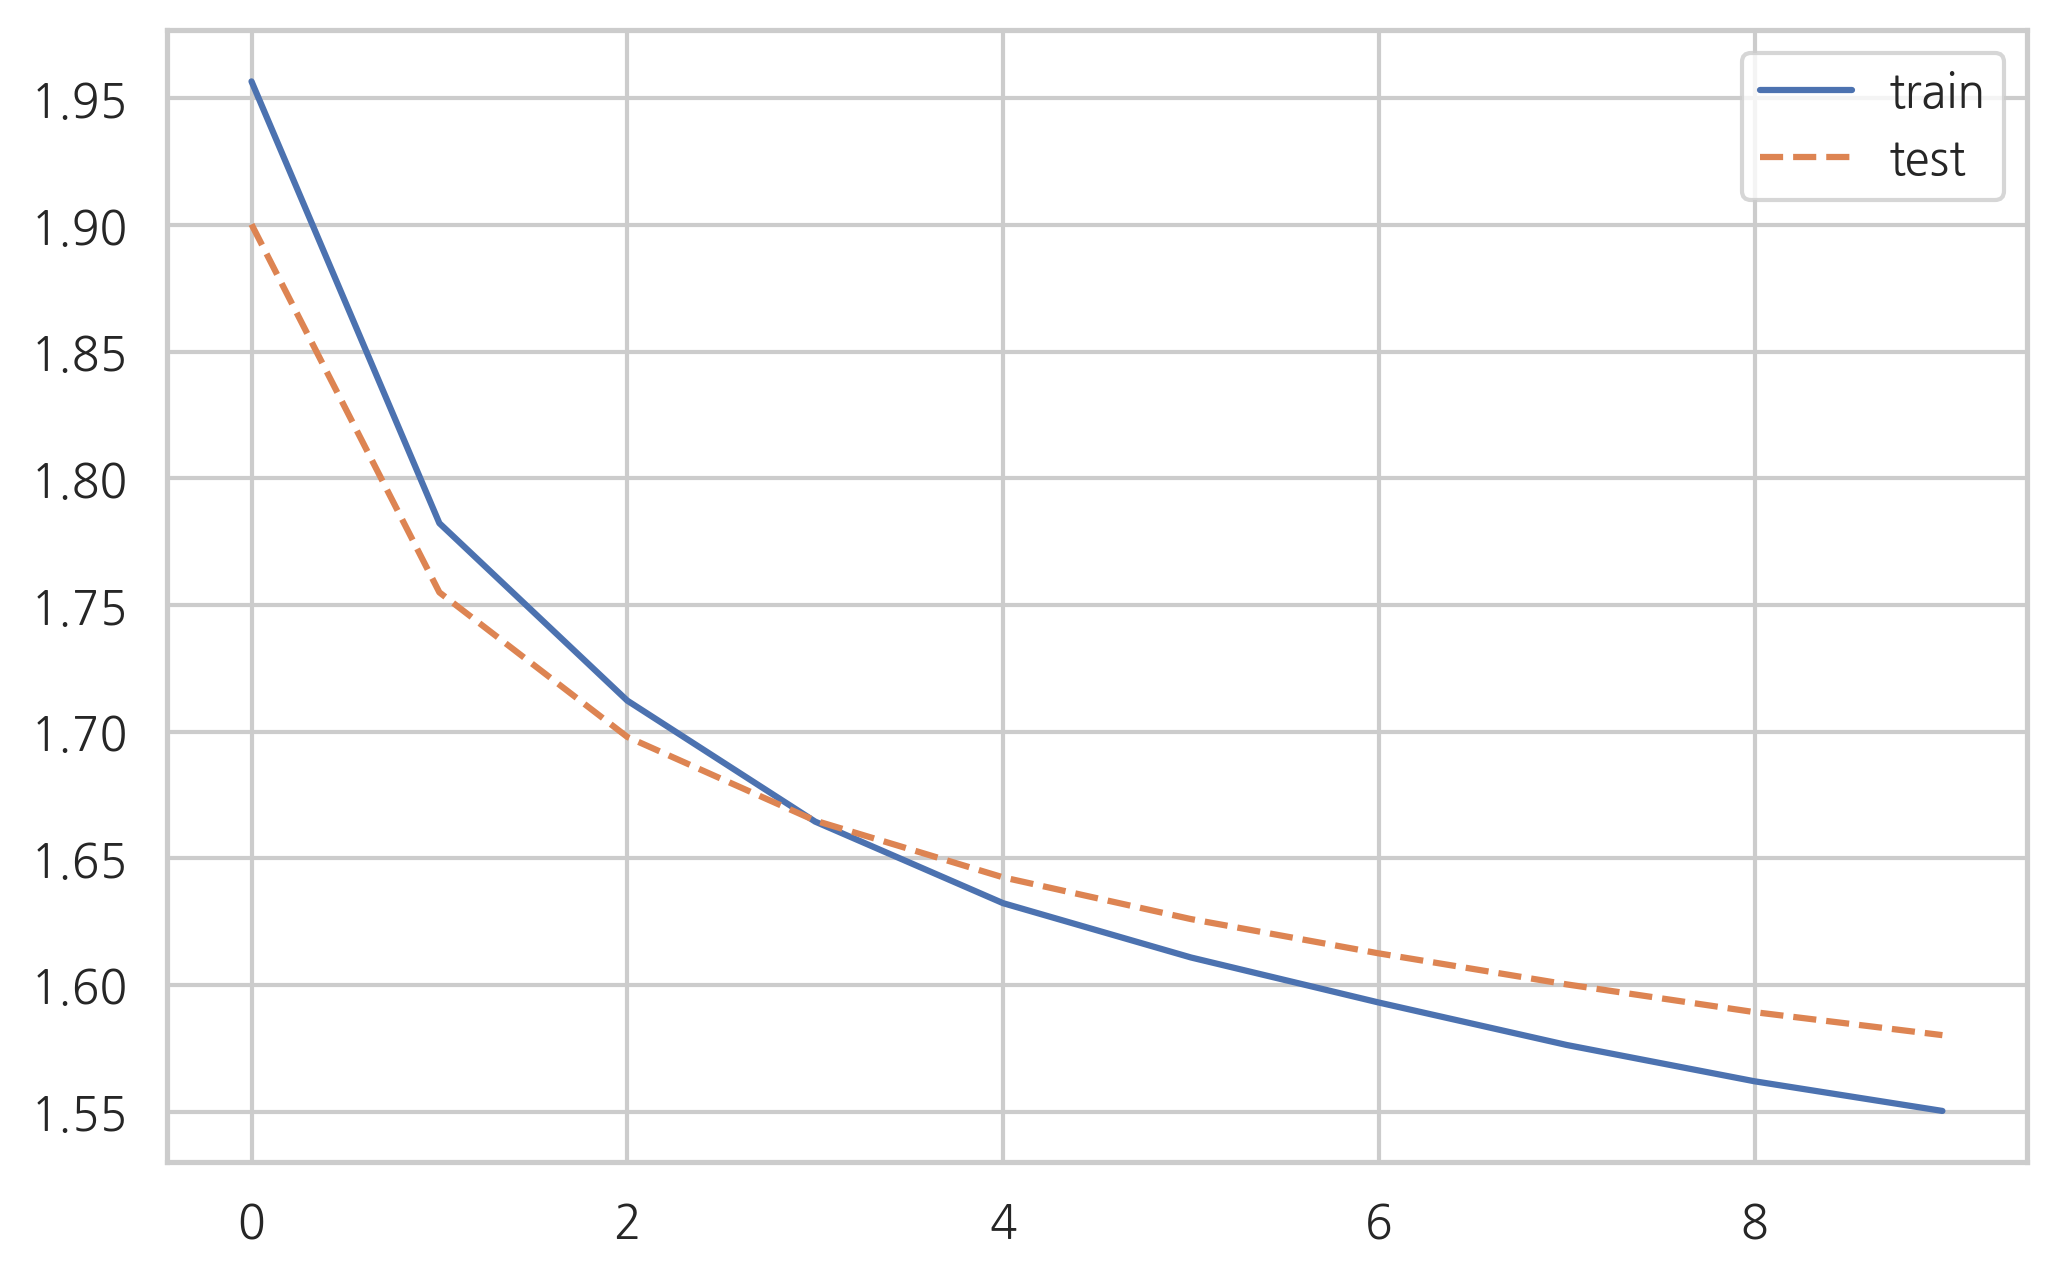

In [7]:
# 결과
plt.plot(loss_train, "-", label="train")
plt.plot(loss_test, "--", label="test")
plt.legend()
plt.show()

### 테스트

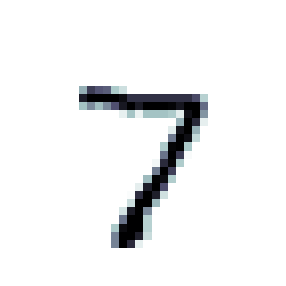

In [8]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

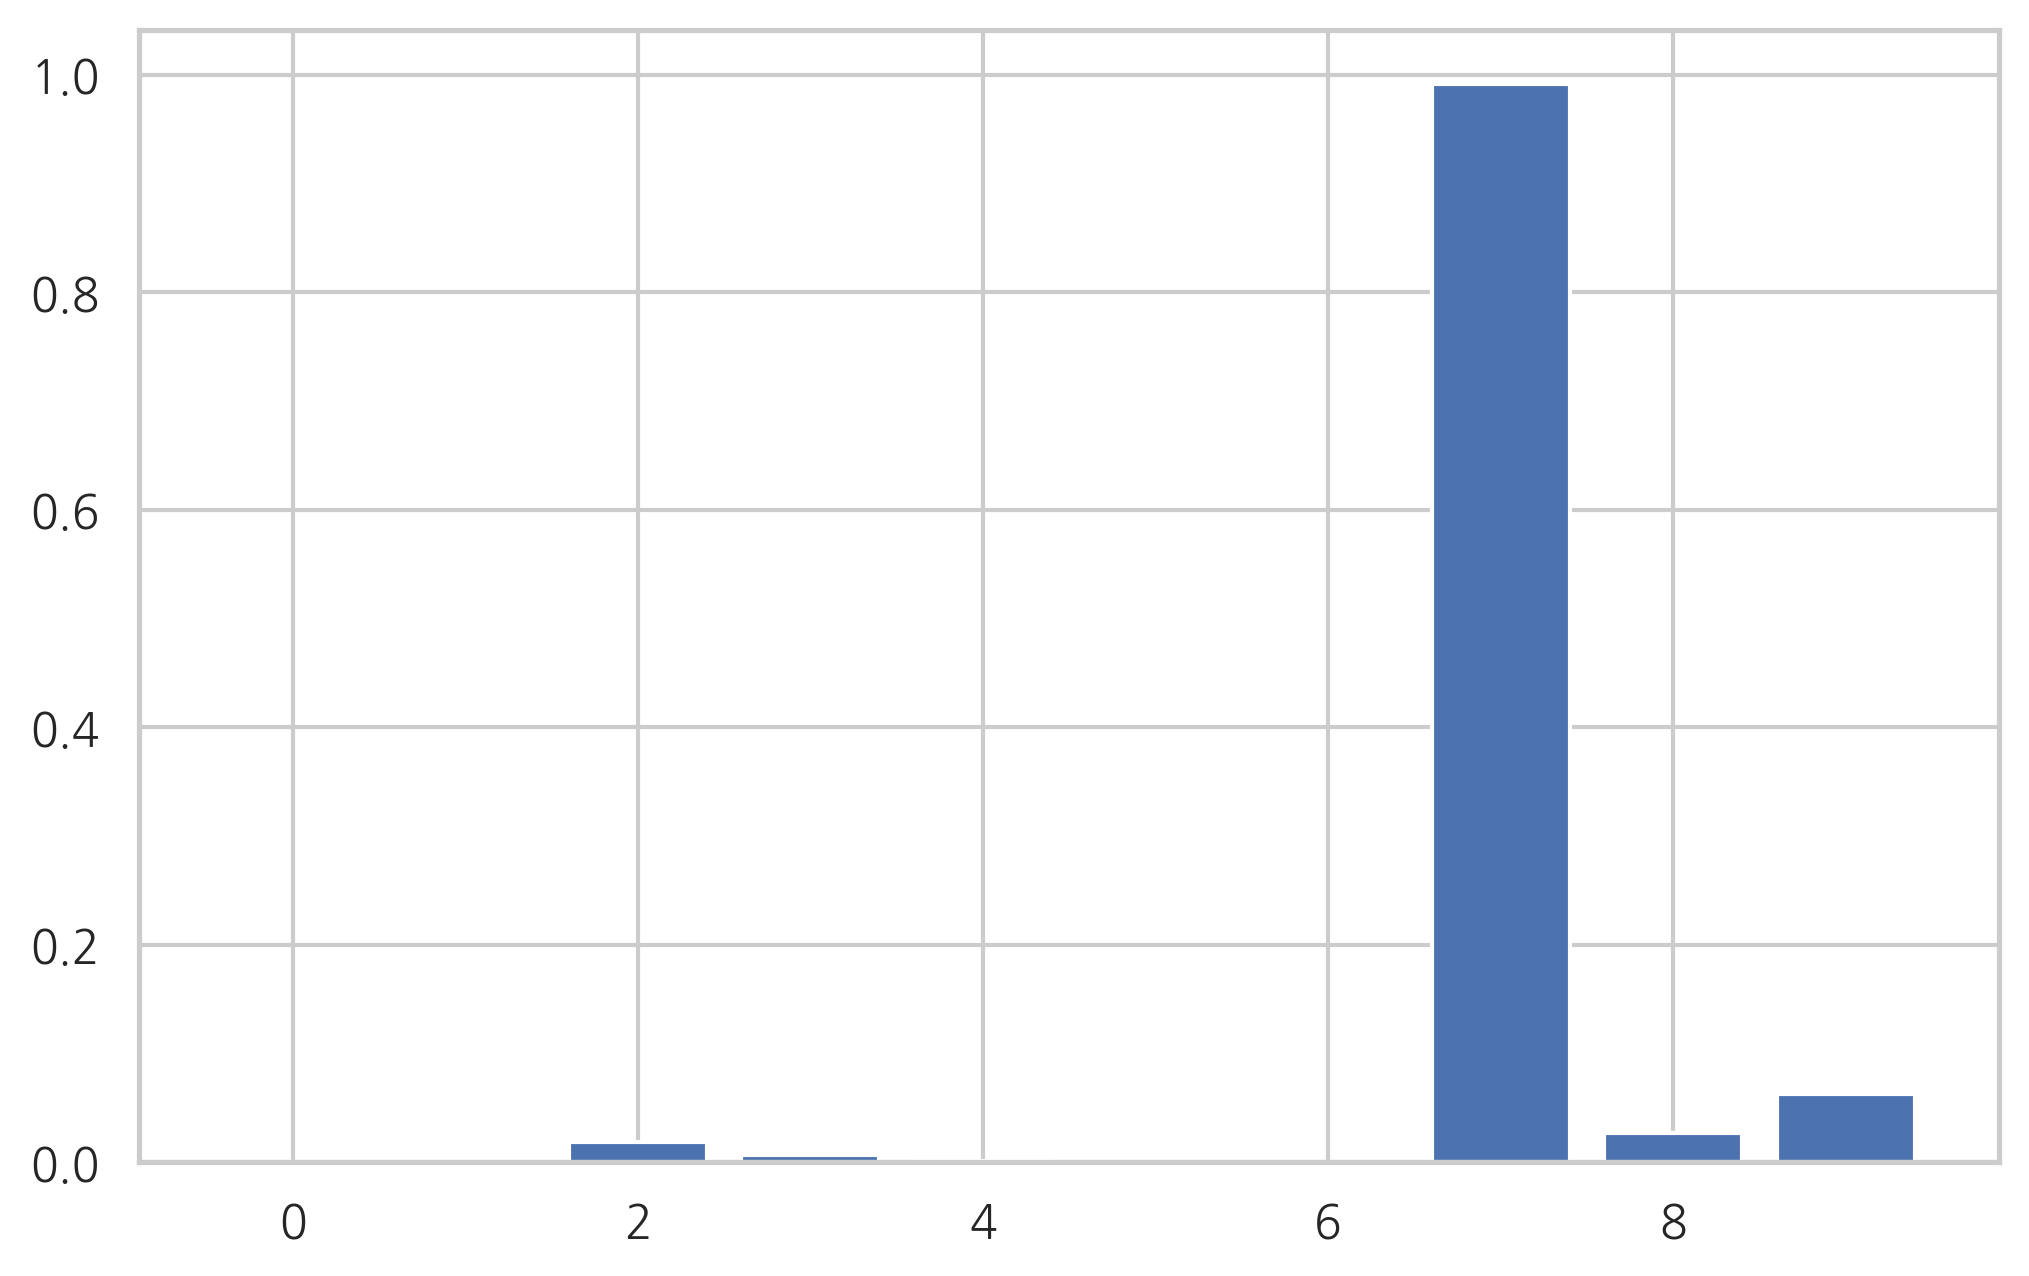

In [9]:
plt.bar(np.arange(10), final_output(X_test[:1, :]).numpy().flatten())
plt.show()